## Python implementation of mixture of gamma distributions

Based on the mixtools R package implementation: https://github.com/cran/mixtools/blob/master/R/gammamixEM.R

The code for this implementation resides in: https://github.com/kundajelab/tfmodisco/blob/master/modisco/gammamix.py

In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np
import scipy
from scipy.stats import gamma

def sample_from_gamma(n, a, scale):   
    return scipy.stats.gamma.ppf(np.random.random(n), a=a, scale=scale)

def generate_sim(mixing_proportion, n, a1, scale1, a2, scale2):

    all_vals1 = sample_from_gamma(int(n*mixing_proportion),
                                  a=a1, scale=scale1)
    all_vals2 = sample_from_gamma(int(n*(1-mixing_proportion)),
                                  a=a2, scale=scale2)

    all_vals = []
    all_vals.extend(all_vals1)
    all_vals.extend(all_vals2)
    return np.array(all_vals)

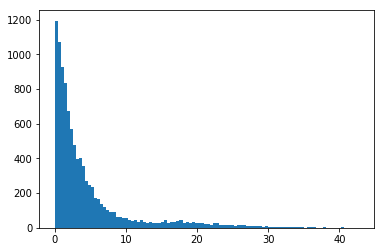

In [3]:
mixing_proportion = 0.9
n = 10000

a1 = 1
scale1 = 3
a2 = 10
scale2 = 2

all_vals = generate_sim(mixing_proportion=mixing_proportion,
                      n=n,
                      a1=a1,
                      scale1=scale1,
                      a2=a2,
                      scale2=scale2)

%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(all_vals, bins=100)
plt.show()

In [4]:
import sys
sys.path.insert(-1,"../../modisco")
import gammamix
results = gammamix.gammamix_em(all_vals, verb=True)

initial vals: [0.20044827 0.79955173] [2.98516293 0.78946714] [8.20958445 0.13891272] 2
iteration = 1 log-lik diff = 27271.83292593038  log-lik = -25444.24352346771
iteration = 2 log-lik diff = 328.6959439707207  log-lik = -25115.54757949699
iteration = 3 log-lik diff = 128.23962168397702  log-lik = -24987.307957813013
iteration = 4 log-lik diff = 72.43727143861906  log-lik = -24914.870686374394
iteration = 5 log-lik diff = 48.319090299461095  log-lik = -24866.551596074933
iteration = 6 log-lik diff = 35.14363158175911  log-lik = -24831.407964493173
iteration = 7 log-lik diff = 26.7665159676435  log-lik = -24804.64144852553
iteration = 8 log-lik diff = 20.88329695885477  log-lik = -24783.758151566675
iteration = 9 log-lik diff = 16.5057997187796  log-lik = -24767.252351847896
iteration = 10 log-lik diff = 13.150760709530005  log-lik = -24754.101591138366
iteration = 11 log-lik diff = 10.548552178286627  log-lik = -24743.55303896008
iteration = 12 log-lik diff = 8.520236711232428  log-l

MixParams(mix_prop=array([0.10046264, 0.89953736]), alpha=array([9.70041159, 1.01559679]), invbeta=array([2.03726259, 2.88027378]), k=2)


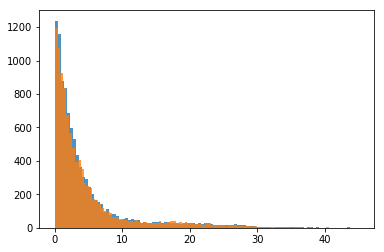

In [13]:
print(results.params)
plt.hist(generate_sim(mixing_proportion=results[0].mix_prop[0],
                      n=n,
                      a1=results[0].alpha[0],
                      scale1=(results[0].invbeta[0]),
                      a2=results[0].alpha[1],
                      scale2=(results[0].invbeta[1])), alpha=0.8, bins=100)
plt.hist(all_vals,alpha=0.8, bins=100)
plt.show()